 ##  1. Tiny images representation + nearest neighbor classifier
each image is resized to a small, fixed resolution (16x16). The tiny image is made to have zero mean and unit length
discards all of the high frequency image content and is not especially invariant to spatial or brightness shifts. We are using tiny images simply as a baseline.

In [1]:
import numpy as np
import cv2
import os
import glob
from  matplotlib import pyplot as plt
%matplotlib inline
import pdb
from collections import Counter

In [2]:
class_label =  os.listdir(f'hw5_data/train/')
print(class_label)

['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


In [3]:
def standardize(image):
    mean = np.mean(image)
    std = np.std(image)
    image = (image-mean) / (std) # to avoid std = 0
    return image
def Tiny(path):
    label = []
    img = []
    for i in class_label:
        dir_path = os.path.join(path,i)
        files = glob.glob(dir_path+'/*.jpg')
        for j in files:
            label.append(i)
            image = cv2.imread(j,cv2.IMREAD_GRAYSCALE)
            # resize to 16x16
            image = cv2.resize(image, (16, 16))
            img.append(standardize(image).reshape(-1,1))
    return label,img

In [4]:
def KNN(k):
    correct = 0
    # calculate the distance with training data
    for i in range(len(test_img)):
        dist = []
        for j in range(len(train_img)):
            dist.append(np.linalg.norm(np.array(train_img[j])-np.array(test_img[i])))
        
        # sort distance in accending order
        # vote with k nearest neighbor
        candidate = np.argsort(dist,axis=0)[:k]
        if Counter(np.array(train_L)[candidate]).most_common(1)[0][0] == test_L[i]:
           correct +=1 
        
    return correct/len(test_L)

In [5]:
train_L, train_img = Tiny('hw5_data/train/')
test_L, test_img = Tiny('hw5_data/test/')

In [6]:
result = [0]
K = 20 
for i in range(1,K+1):
    result.append(KNN(i))

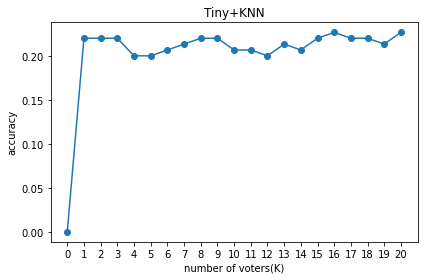

In [7]:
plt.plot(np.arange(0, K+1, step=1),result, marker='o')
plt.xticks(np.arange(0, K+1, step=1))
plt.title('Tiny+KNN')
plt.xlabel("number of voters(K)")
plt.ylabel("accuracy")
plt.tight_layout()